#### Домашнее задание
Настройка числа кластеров в алгоритме K-Means. Elbow и Silhouette метод.
<br>Цель: Взять последний датасет по задаче классификации с которым вы работали, убрать целевую переменную и вычислить число кластеров по методу к-средних. проверить и оценить подбор числа кластеров методом локтя

In [1]:
import pandas as pd
import numpy as np
import time

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler #, MinMaxScaler, RobustScaler
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer

In [11]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics import silhouette_score

In [289]:
# Divorce Predictors data set Data Set 
data_path = '/Users/katush/Documents/Otus/ML/L13-Gradient boosting/divorce/'
data = pd.read_csv(data_path+'divorce.csv', sep=';')
real_answers = data['Class'].copy()
print(answers.unique())
data.drop('Class', axis=1, inplace=True)
data.shape

[1 0]


(170, 54)

In [197]:
data.describe()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.458824,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.499925,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [ ]:
# For distance-based and density-based clustering algorithms scaling data is important!
data_scaled = StandardScaler().fit_transform(data)

Text(0.5, 1.0, 'Distribultion of scores per answer')

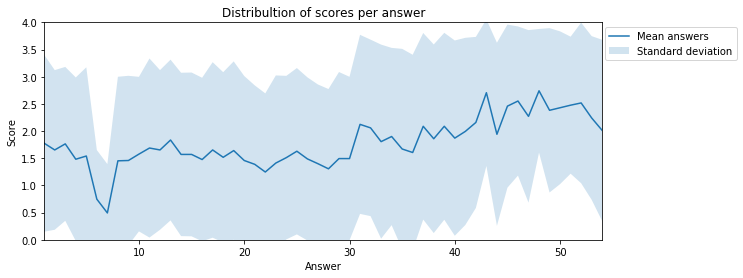

In [198]:
n = data.shape[1]

plt.figure(figsize=(10, 4))
plt.plot(range(1, n+1), data.mean(), label='Mean answers')
plt.fill_between(range(1, n+1), data.mean() - data.std(), data.mean() + data.std(), alpha=0.2, label='Standard deviation')
plt.xlabel('Answer')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.25, 1))
plt.ylim((0, 4))
plt.xlim((1, n))
plt.title('Distribultion of scores per answer')

# Distance clustering - K-Means
#### _Elbow Method, Silhouette Score_

Text(0, 0.5, 'Silhouette Score')

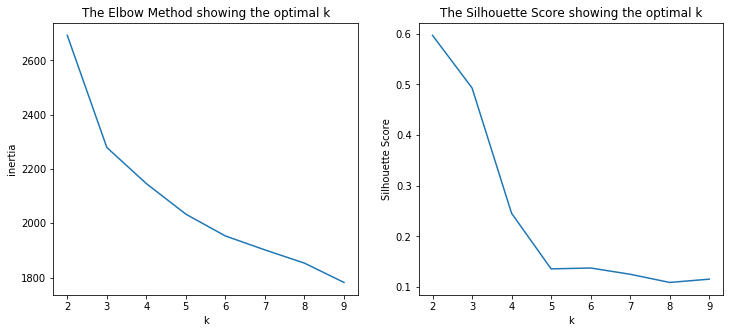

In [256]:
inertia, sil_score = [], []
k = range(2, 10)
for k_i in k:
    km = KMeans(n_clusters=k_i).fit(data_scaled)
    inertia.append(km.inertia_)
    sil_score.append(silhouette_score(data_scaled, km.labels_))

plt.figure(figsize=(12, 5))
plt.subplot(121, title='The Elbow Method showing the optimal k')
plt.plot(k, inertia)
plt.xlabel('k')
plt.ylabel('inertia')

plt.subplot(122, title='The Silhouette Score showing the optimal k')
plt.plot(k, sil_score)
plt.xlabel('k')
plt.ylabel('Silhouette Score')

Метод локтя показывает сильное изменение на всем рассматриваемом диапазоне, в то время как метод Silhuette показывает наибольшее значение силуэта при числе кластеров, равным 2, поэтому выберем число кластеров 2.

In [290]:
kmeans = KMeans(n_clusters=2)
kmeans_pred = kmeans.fit_predict(data_scaled)

### _Visualising the clusters_

Для визуализации кластеров, полученных на данных размера (170,54), воспользуемся методом снижения размерности PCA (Principal Component Analysis):

In [245]:
from sklearn.decomposition import PCA

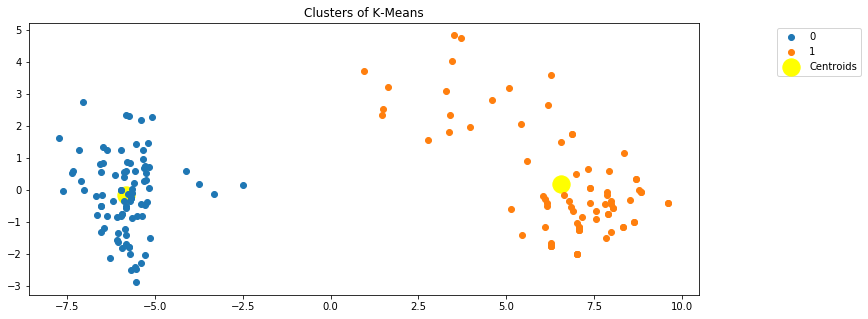

In [301]:
pca = PCA(n_components=2)
pca.fit(data_scaled)
data_pca = pca.transform(data_scaled)
centers_pca = pca.transform(kmeans.cluster_centers_)

# Plotting the results of PCA
plt.figure(figsize=(12, 5))
plt.plot(data_pca[kmeans_pred == 0, 0], data_pca[kmeans_pred == 0, 1], 'o', label='0')
plt.plot(data_pca[kmeans_pred == 1, 0], data_pca[kmeans_pred == 1, 1], 'o', label='1')

plt.scatter(centers_pca[:, 0], centers_pca[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of K-Means')
plt.legend(bbox_to_anchor=(1.25, 1))

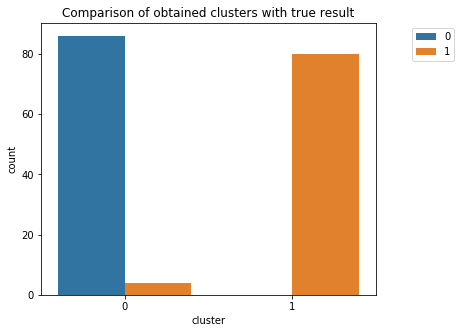

In [302]:
# Plotting comparison of prediction with true
def comarison_plot(prediction):
    global real_answers
    df = pd.DataFrame([prediction, real_answers], index=['cluster', 'true result']).T.reset_index()
    df1 = df.pivot_table(index=['cluster', 'true result'],
                         values='index',
                         aggfunc='count').reset_index().rename(columns={'index':'count'})
    plt.figure(figsize=(6, 5))
    sns.barplot(x='cluster', y='count', hue='true result', data=df1)
    plt.title('Comparison of obtained clusters with true result')
    plt.legend(bbox_to_anchor=(1.25, 1))

comarison_plot(kmeans_pred)

Визуализация выше показала наличие 2 больших кластеров.
<br>Сравнение с реальными значениями подтверждает, что рассматривается именно 2 кластера, поэтому модель отработала корректно.
<br>Стоит отметить, что кластер не разведенных захватывает случаи разведеных. Полагаю это связно с тем, что некоторые пары были не уверены в стабильности отношений и давали пограничные ответы в опросе.

### Домашнее задание
Построение различных вариантов кластеризаций и интерпретация результатов.
Цель: использовать любой датасет для задачи кластеризации

# Density clustering - DBScan

In [295]:
for e in [0.001, 0.01, 0.1]:
    for ms in range(3, 8):
        db = DBSCAN(eps=e, min_samples=ms).fit(data_scaled)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        dbscan_pred = db.labels_
        n_clusters_ = len(set(dbscan_pred)) - (1 if -1 in dbscan_pred else 0)
        n_noise_ = list(dbscan_pred).count(-1)
        if n_clusters_!=0:
            print(e, ms)
            print('Estimated number of clusters: %d' % n_clusters_)
            print('Estimated number of noise points: %d' % n_noise_)
            print(pd.Series(dbscan_pred).value_counts())
            print('')

0.001 3
Estimated number of clusters: 3
Estimated number of noise points: 159
-1    159
 2      4
 0      4
 1      3
dtype: int64

0.001 4
Estimated number of clusters: 2
Estimated number of noise points: 162
-1    162
 1      4
 0      4
dtype: int64

0.01 3
Estimated number of clusters: 3
Estimated number of noise points: 159
-1    159
 2      4
 0      4
 1      3
dtype: int64

0.01 4
Estimated number of clusters: 2
Estimated number of noise points: 162
-1    162
 1      4
 0      4
dtype: int64

0.1 3
Estimated number of clusters: 3
Estimated number of noise points: 159
-1    159
 2      4
 0      4
 1      3
dtype: int64

0.1 4
Estimated number of clusters: 2
Estimated number of noise points: 162
-1    162
 1      4
 0      4
dtype: int64



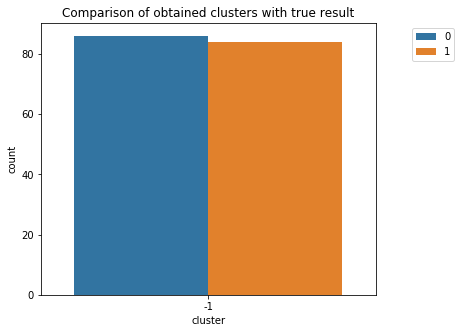

In [296]:
comarison_plot(dbscan_pred)

Рассмотренные выше варианты для DBScan не позволили реализовать качественную кластеризацию.
<br>Возможно из-за разной плотности кластеров - на рисунке выше (визуализация результатов K-Means) можно наблюдать, что кластеры имеют неоднородное распределение. Для борьбы с неоднородной плотностью воспользуемся другим плотностным методом - OPTICS.

# Density clustering - OPTICS

Метод OPTICS находит ядра высокой плотности и расширяет кластеры из них. Умеет работать с данными разной плотности. Метод sklearn.cluster.OPTICS сначала использует свои методы детекции, а затем устанавливает thresholds - пороги досягаемости, которые коррелируют с методом sklearn.cluster.DBSCAN. Таким образом некоторые кластеры OPTICS могут быть реализованы через метод DBSAN.

In [274]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan

In [292]:
optics = OPTICS(min_samples=50, xi=.05, min_cluster_size=.05)
optics.fit(data_scaled)

labels_001 = cluster_optics_dbscan(reachability=optics.reachability_,
                                   core_distances=optics.core_distances_,
                                   ordering=optics.ordering_, eps=0.01)

labels_010 = cluster_optics_dbscan(reachability=optics.reachability_,
                                   core_distances=optics.core_distances_,
                                   ordering=optics.ordering_, eps=0.1)

space = np.arange(len(data_scaled))
reachability = optics.reachability_[optics.ordering_]
optics_pred = optics.labels_[optics.ordering_]

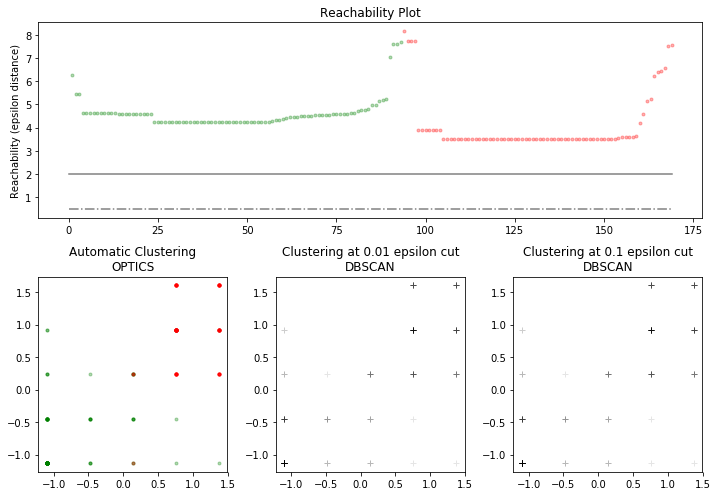

In [293]:
plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Reachability plot
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = space[optics_pred == klass]
    Rk = reachability[optics_pred == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[optics_pred == -1], reachability[optics_pred == -1], 'k.', alpha=0.3)
ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
ax1.set_ylabel('Reachability (epsilon distance)')
ax1.set_title('Reachability Plot')

# OPTICS
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = data_scaled[optics.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(data_scaled[optics.labels_ == -1, 0], data_scaled[optics.labels_ == -1, 1], 'k+', alpha=0.1)
ax2.set_title('Automatic Clustering\nOPTICS')

# DBSCAN at 0.01
colors = ['g', 'greenyellow', 'olive', 'r', 'b', 'c']
for klass, color in zip(range(0, 6), colors):
    Xk = data_scaled[labels_001 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker='.')
ax3.plot(data_scaled[labels_001 == -1, 0], data_scaled[labels_001 == -1, 1], 'k+', alpha=0.1)
ax3.set_title('Clustering at 0.01 epsilon cut\nDBSCAN')

# DBSCAN at 0.1
colors = ['g.', 'm.', 'y.', 'c.']
for klass, color in zip(range(0, 4), colors):
    Xk = data_scaled[labels_010 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(data_scaled[labels_010 == -1, 0], data_scaled[labels_010 == -1, 1], 'k+', alpha=0.1)
ax4.set_title('Clustering at 0.1 epsilon cut\nDBSCAN')

plt.tight_layout()

Из графиков заметно, что OPTICS разделяет данные на два класса, в то время как DBSCAN находит только один класс (на графике только плюсы).

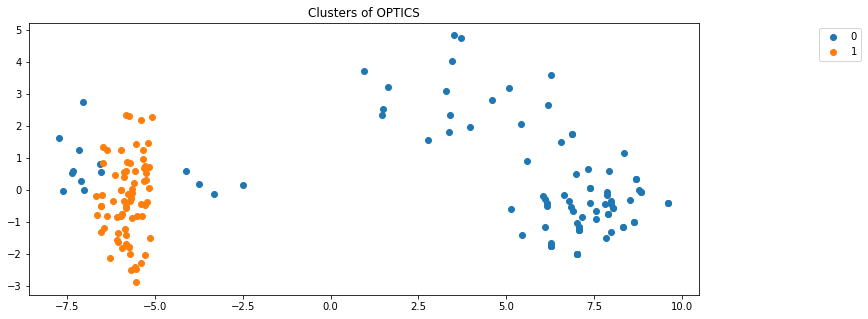

In [300]:
pca = PCA(n_components=2)
pca.fit(data_scaled)
data_pca = pca.transform(data_scaled)

# Plotting the results of PCA
plt.figure(figsize=(12, 5))
plt.plot(data_pca[optics_pred == 0, 0], data_pca[optics_pred == 0, 1], 'o', label='0')
plt.plot(data_pca[optics_pred == 1, 0], data_pca[optics_pred == 1, 1], 'o', label='1')
plt.title('Clusters of OPTICS')
plt.legend(bbox_to_anchor=(1.25, 1))

Кластеру 0 соответсвует вариант со случаями развода, с небольшой примесью случаев не развода, в то время как кластеру 1 однозначно соответвуют случаи не развода.
<br>И данная кластеризация добавляет "примесь" в противоположный случай, чем K-Means, то есть кластер разведенных по плотности охватывает случаи не разведенных.

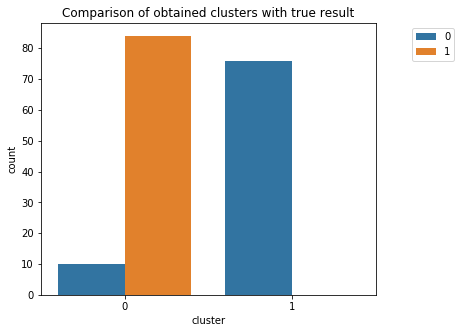

In [294]:
comarison_plot(optics_pred)

# Hierarchical clustering - sklearn.cluster.AgglomerativeClustering

https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

In [423]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

In [428]:
def hierarchical_model(linkage):
    global data_scaled, real_answers
    
    # Model
    hierarchical = AgglomerativeClustering(n_clusters=2, linkage=linkage).fit(data_scaled)
    hierarchical_pred = hierarchical.labels_
    
    # 
    Z = hierarchy.linkage(hierarchical.children_)

    # Dimensionality reduction
    pca = PCA(n_components=2)
    pca.fit(data_scaled)
    data_pca = pca.transform(data_scaled)

    df = pd.DataFrame([hierarchical_pred, real_answers], index=['cluster', 'true result']).T.reset_index()
    df1 = df.pivot_table(index=['cluster', 'true result'],
                         values='index',
                         aggfunc='count').reset_index().rename(columns={'index':'count'})
    
    # Visualization
    fig = plt.figure(figsize=(14, 6))
    ax1 = plt.subplot2grid((3,4), (0,0), colspan=1, rowspan=3)
    sns.barplot(x='cluster', y='count', hue='true result', data=df1)
    plt.legend()
    plt.title(f'Prediction vs real for {linkage.upper()} AC')
    
    ax2 = plt.subplot2grid((3,4), (0,1), colspan=3, rowspan=2)
    dn = hierarchy.dendrogram(Z, above_threshold_color='y', orientation='top')
    plt.xticks([])
    plt.title(f'Dendogram for {linkage.upper()} AC')
    
    ax3 = plt.subplot2grid((3,4), (2,1), colspan=3)
    plt.plot(data_pca[hierarchical_pred == 0, 0], data_pca[hierarchical_pred == 0, 1], 'o', label='0')
    plt.plot(data_pca[hierarchical_pred == 1, 0], data_pca[hierarchical_pred == 1, 1], 'o', label='1')
    plt.legend()
    plt.title(f'Clusters via PCA for {linkage.upper()} AC')
    
    plt.tight_layout()

- ward minimizes the variance of the clusters being merged
- complete or maximum linkage uses the maximum distances between all observations of the two sets
- average uses the average of the distances of each observation of the two sets
- single uses the minimum of the distances between all observations of the two sets

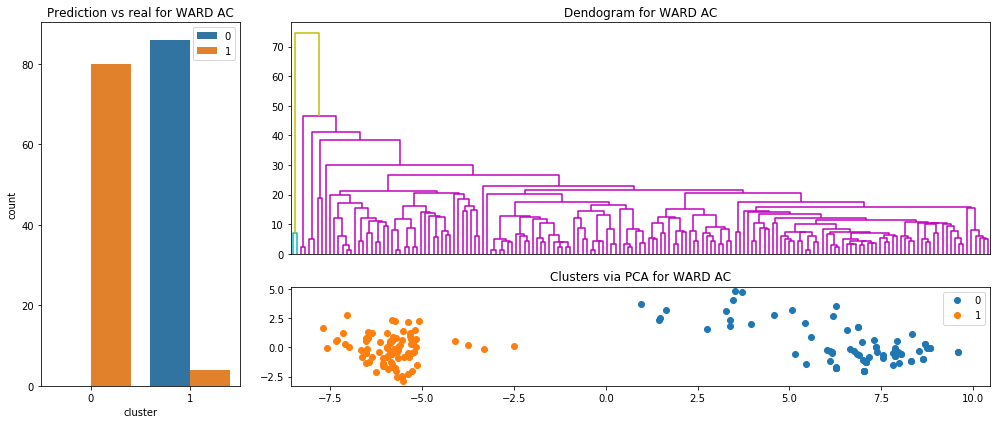

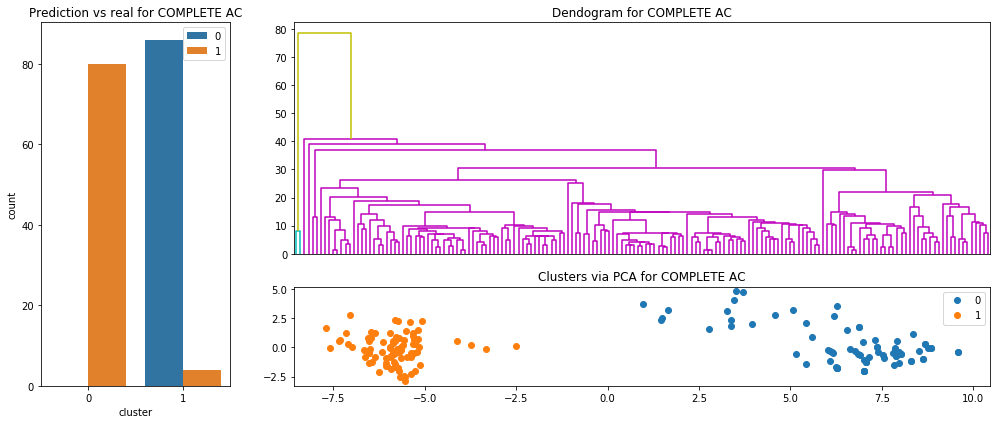

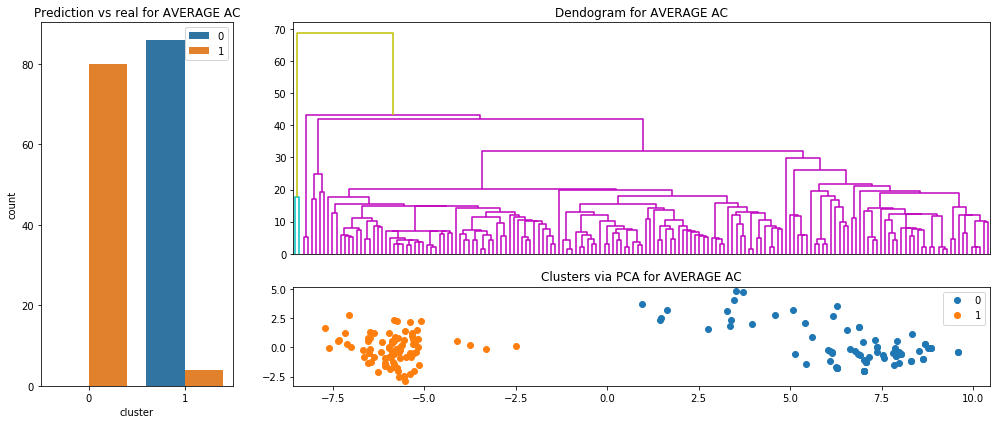

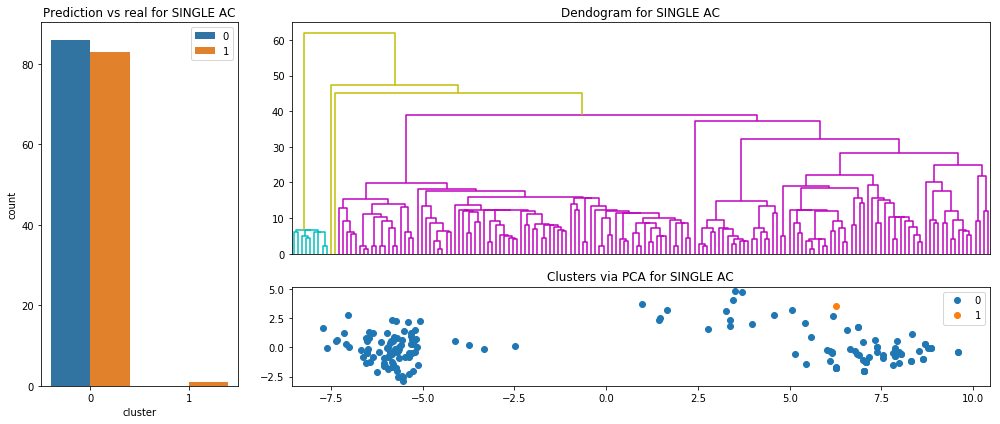

In [429]:
for l in ['ward', 'complete', 'average', 'single']:
    hierarchical_model(l)

Для наших данных виды связи **ward, complete и average** показали одинаковое качество, в то время как **single** показал практически не разделил данные на кластеры.
<br>Метод связи single использует минимум дистанции между всеми наблюдаемыми точками двух наборов данных:

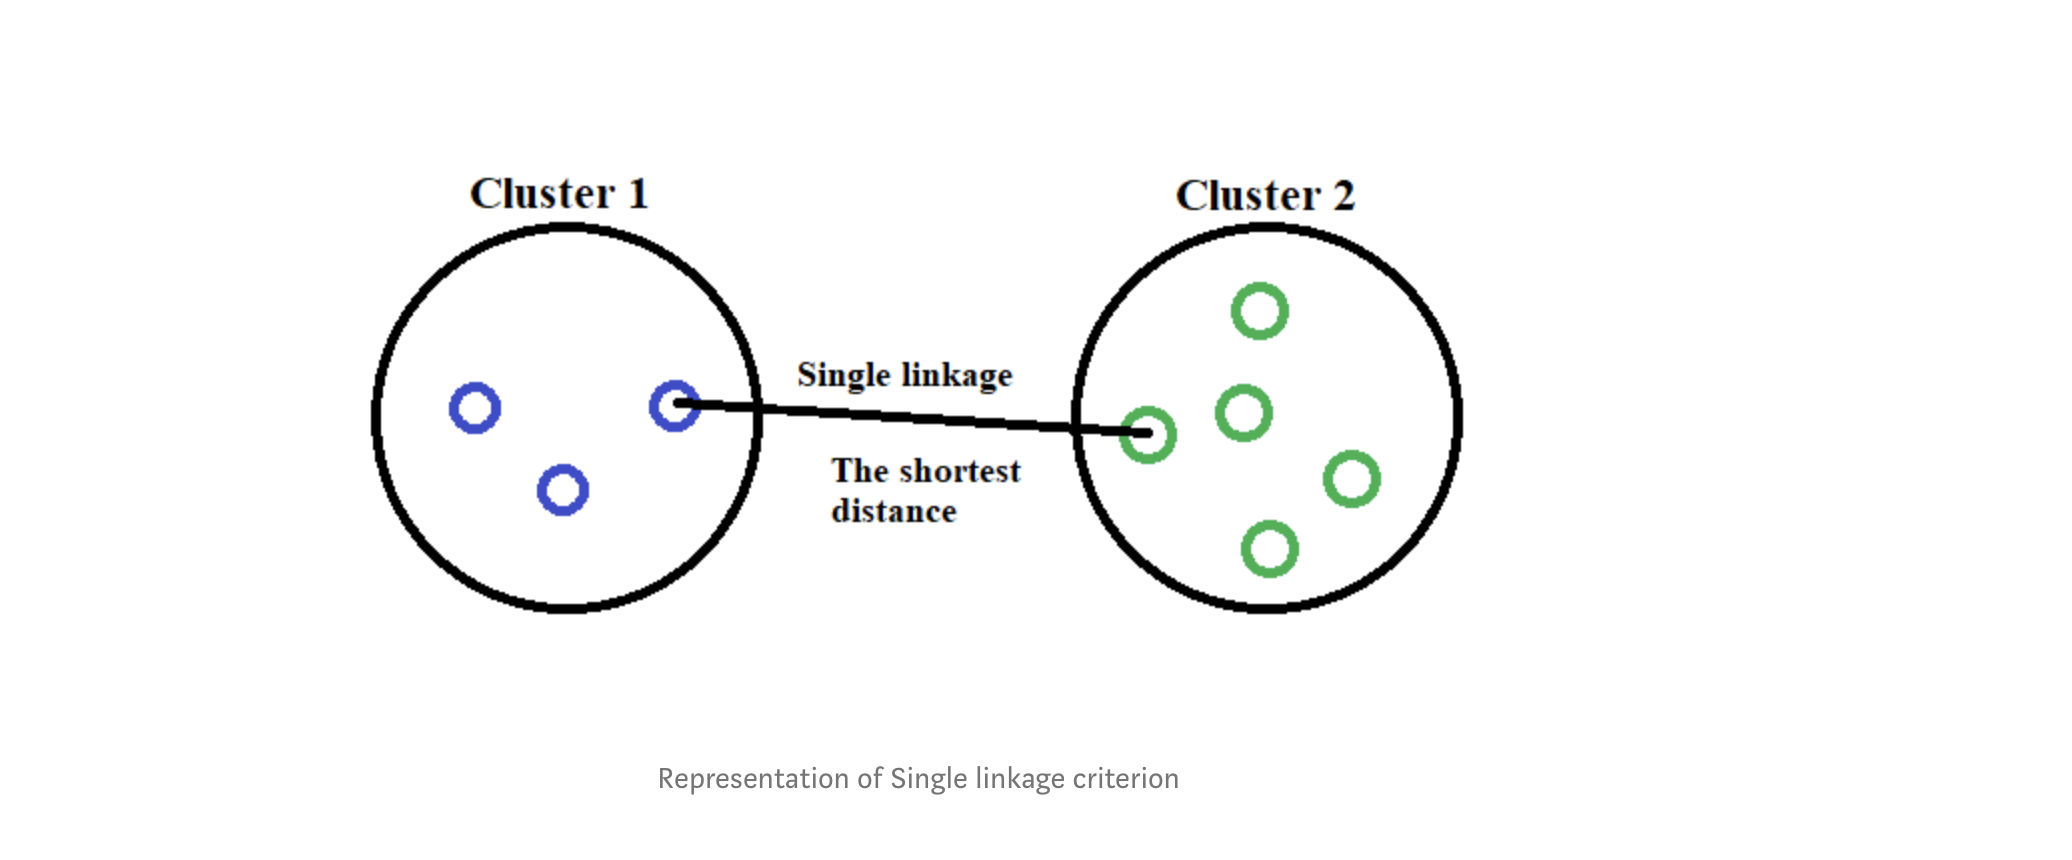